# Análise das métricas

### Código para as execuções

In [ ]:
from video import Video
from tracker import Tracker
from counter import Counter
from video_processor import VideoProcessor

def execucao(linha):
    video_path = 'dataset/road_video001.mp4'
    output_path = 'outputs/road_video001.mp4'

    # Carrega o modelo e seleciona as classes
    tracker = Tracker('yolov8n.pt', classes=[2, 7], tracker='bytetrack.yaml')

    res = []

    # Processando múltiplos vídeos
    for k in range(3):
        for i in range(1, 6):
            video_path = f'dataset/road_video00{i}.mp4'
            output_path = f'outputs/road_video00{i}.mp4'
            
            # Carrega o vídeo
            video = Video(video_path)
            
            # Define a linha de contagem
            start = (0, int(video.HEIGHT * 2/3))
            end = (video.WIDTH, int(video.HEIGHT * 2/3))
            
            # Inicializa o contador
            counter = Counter()
            
            # Processa o vídeo
            if linha:
                video_processor = VideoProcessor(video, tracker, counter, output_path, start, end)
            else:
                video_processor = VideoProcessor(video, tracker, counter, output_path)
                
            video_processor.process()
            
            # Armazena os resultados
            res.append({
                'execucao': k + 1,
                'veiculos_detectados': counter.count,
                'tempo_processamento': video_processor.time,
                'fps': video_processor.fps,
            })
            
    return res

### Código para visualização

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def compare(results):
    # Número de execuções
    num_execucoes = max([r['execucao'] for r in results])

    # Inicializar listas para armazenar médias
    fps_medias = []
    veiculos_detectados_medias = []
    tempo_processamento_medias = []

    # Calcular médias para cada execução
    for execucao in range(1, num_execucoes + 1):
        exec_results = [r for r in results if r['execucao'] == execucao]
        fps_medias.append(np.mean([r['fps'] for r in exec_results]))
        veiculos_detectados_medias.append(np.mean([r['veiculos_detectados'] for r in exec_results]))
        tempo_processamento_medias.append(np.mean([r['tempo_processamento'] for r in exec_results]))

    # Calcular médias gerais
    fps_media_geral = np.mean(fps_medias)
    veiculos_detectados_media_geral = np.mean(veiculos_detectados_medias)
    tempo_processamento_media_geral = np.mean(tempo_processamento_medias)

    # Definir a largura das barras
    bar_width = 0.35

    # Calcular os deslocamentos para posicionar as barras
    x = np.arange(num_execucoes)

    # Ajustando o tamanho do gráfico e plotando cada métrica com a média
    plt.figure(figsize=(18, 6))

    # Gráfico para FPS
    plt.subplot(1, 3, 1)
    plt.bar(x, fps_medias, width=bar_width, label='FPS Médio', color='blue')
    plt.axhline(y=fps_media_geral, color='r', linestyle='--', label=f'Média Geral: {fps_media_geral:.2f}')
    plt.xlabel('Execuções')
    plt.ylabel('FPS')
    plt.title('Frames por Segundo Médio')
    plt.xticks(x, [f'Execução {i+1}' for i in range(num_execucoes)])
    plt.legend()

    # Gráfico para Veículos Detectados
    plt.subplot(1, 3, 2)
    plt.bar(x, veiculos_detectados_medias, width=bar_width, label='Veículos Detectados Médio', color='green')
    plt.axhline(y=veiculos_detectados_media_geral, color='r', linestyle='--', label=f'Média Geral: {veiculos_detectados_media_geral:.2f}')
    plt.xlabel('Execuções')
    plt.ylabel('Veículos Detectados')
    plt.title('Veículos Detectados Médio por Execução')
    plt.xticks(x, [f'Execução {i+1}' for i in range(num_execucoes)])
    plt.legend()

    # Gráfico para Tempo de Processamento
    plt.subplot(1, 3, 3)
    plt.bar(x, tempo_processamento_medias, width=bar_width, label='Tempo de Processamento Médio', color='yellow')
    plt.axhline(y=tempo_processamento_media_geral, color='r', linestyle='--', label=f'Média Geral: {tempo_processamento_media_geral:.2f}')
    plt.xlabel('Execuções')
    plt.ylabel('Tempo (s)')
    plt.title('Tempo de Processamento Médio por Execução')
    plt.xticks(x, [f'Execução {i+1}' for i in range(num_execucoes)])
    plt.legend()

    plt.tight_layout()
    plt.show()

## Contagem global

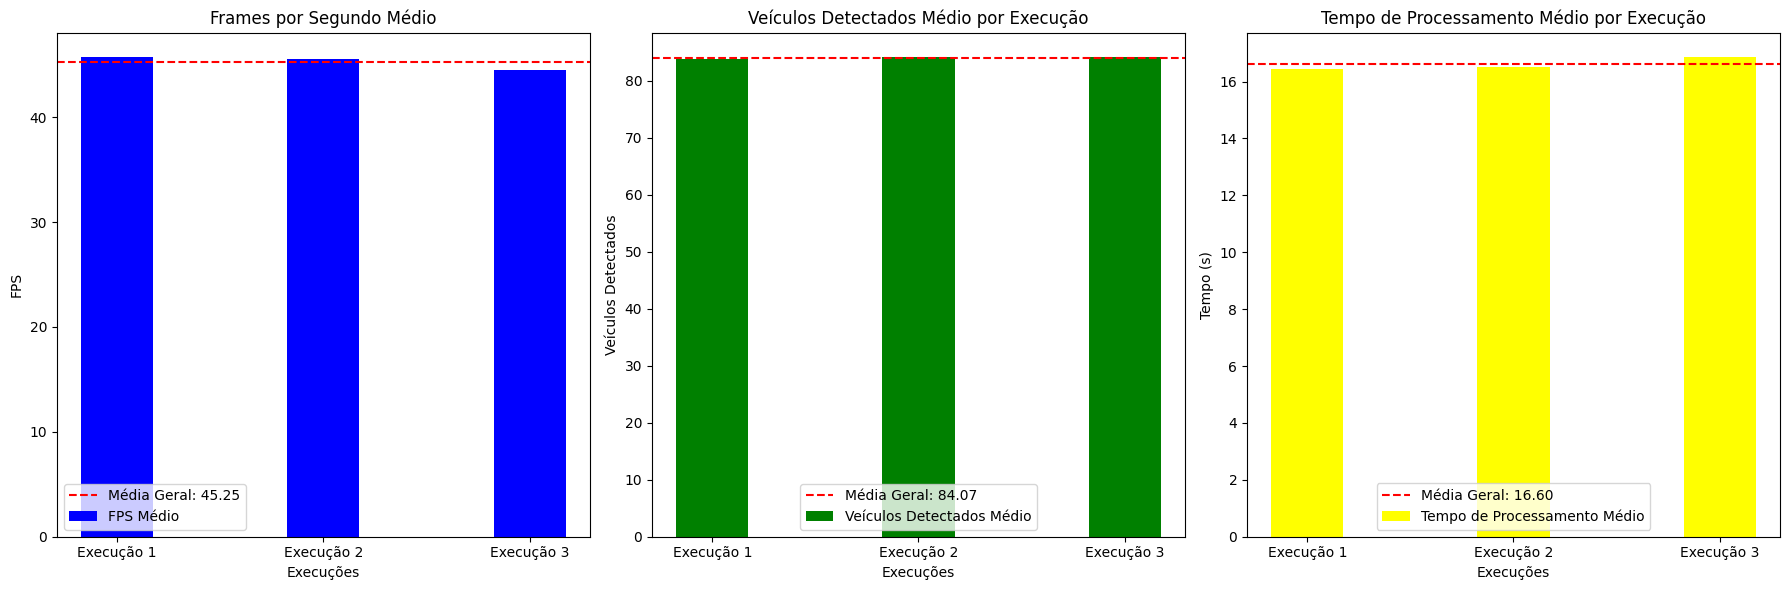

In [7]:
res = execucao(linha=False)

compare(res)

## Contagem por linha

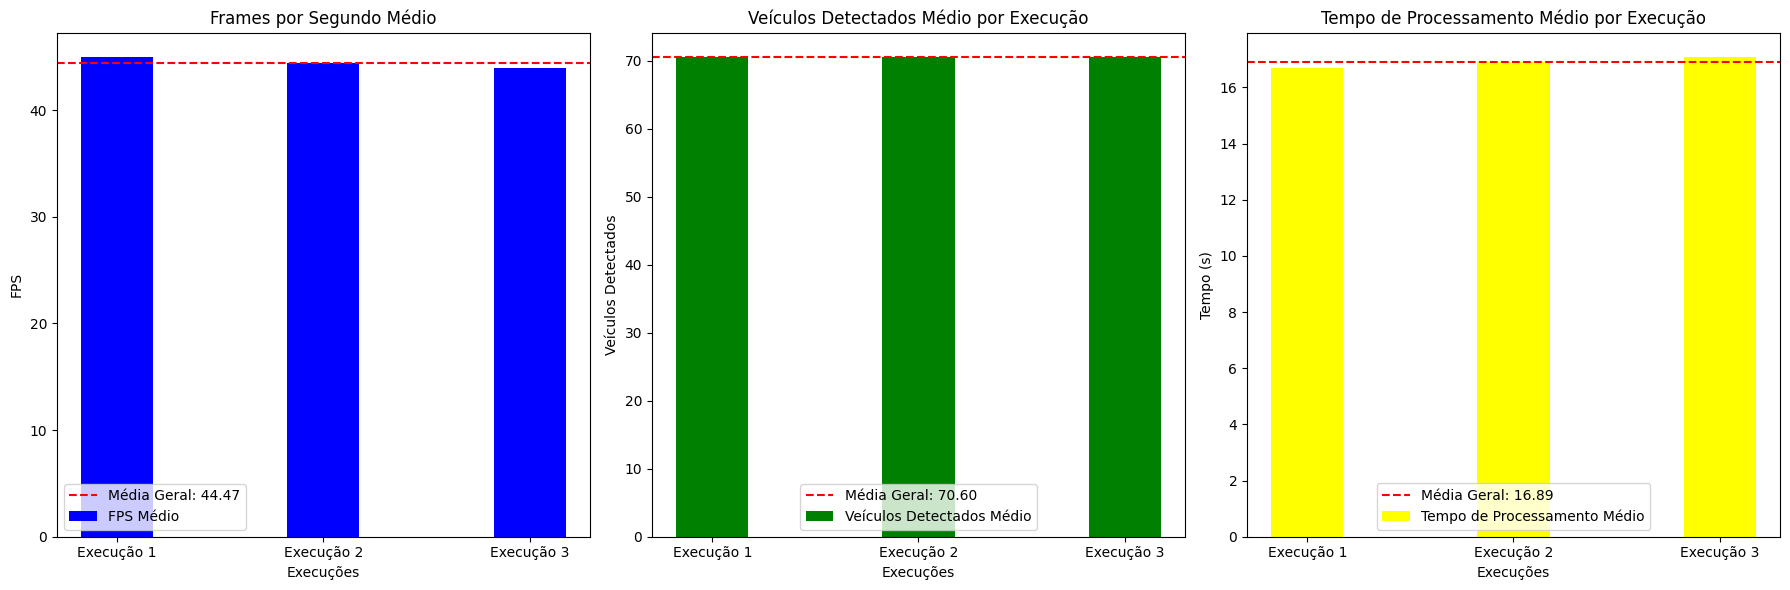

In [8]:
res = execucao(linha=True)

compare(res)